In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn. discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
Bike = load_data('Bikeshare')

In [5]:
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

## Linear Regression

In [6]:
X = MS(['mnth',
        'hr',
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M_lm = sm.OLS(Y, X).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [9]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')

In [10]:
X2 = MS([mnth_encode,
         hr_encode,
         'workingday',
         'temp',
         'weathersit']).fit_transform(Bike)
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)

In [11]:
np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)

1.447193226642821e-20

In [12]:
np.allclose(M_lm.fittedvalues , M2_lm.fittedvalues)

True

In [13]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64

In [15]:
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([
    coef_month,
    pd.Series([-coef_month.sum()],
              index =['mnth[Dec]'
                      ])
                ])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64

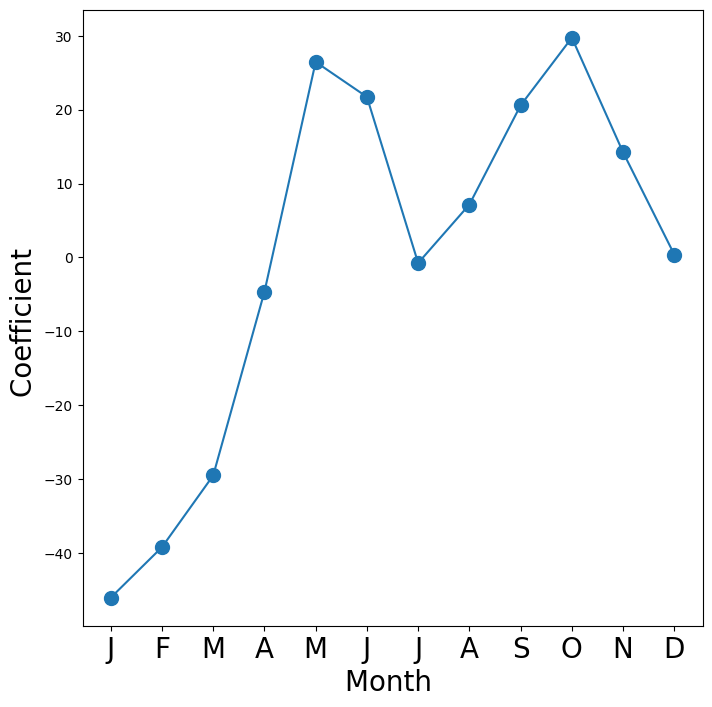

In [16]:
fig_month , ax_month = subplots(figsize =(8 ,8))
x_month = np.arange(coef_month.shape [0])
ax_month.plot(x_month , coef_month , marker='o', ms =10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels ([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month ', fontsize =20)
ax_month.set_ylabel('Coefficient ', fontsize =20);

In [18]:
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex (['hr[{0}] '.format(h) for h in range (23) ])
coef_hr = pd.concat([coef_hr,
                     pd.Series([- coef_hr.sum()], index=['hr[23]'])
                               ])

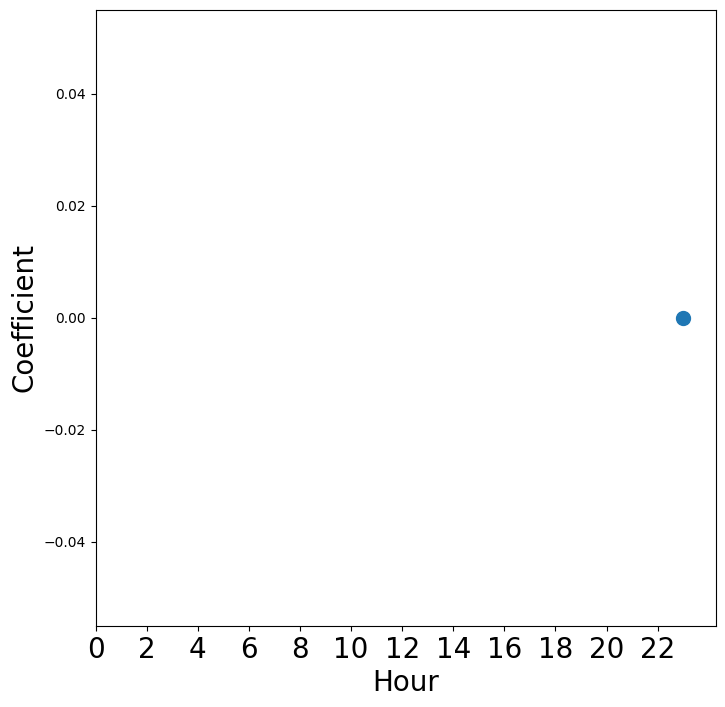

In [20]:
fig_hr , ax_hr = subplots(figsize =(8 ,8))
x_hr = np.arange(coef_hr.shape [0])
ax_hr.plot(x_hr , coef_hr , marker='o', ms =10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize =20)
ax_hr.set_xlabel('Hour', fontsize =20)
ax_hr.set_ylabel('Coefficient', fontsize =20);

## Poisson Regression

In [21]:
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()

In [23]:
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month,
                        pd.Series([-coef_month.sum()],
                                  index =['mnth[Dec]'])])
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr,
                      pd.Series([-coef_hr.sum()],
                                index =['hr[23]'])])

/tmp/ipykernel_8620/805082458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hr.set_xticklabels (range(24)[::2] , fontsize =20)


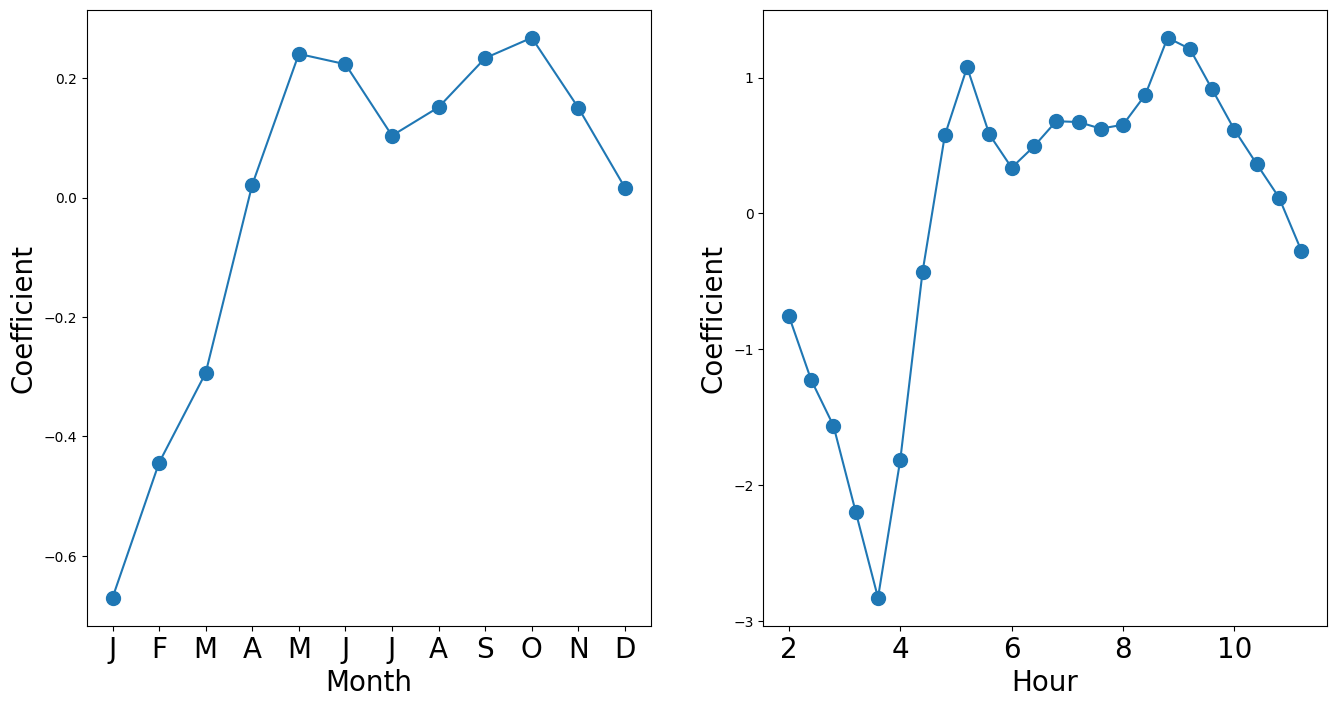

In [24]:
fig_pois , (ax_month , ax_hr) = subplots(1, 2, figsize =(16 ,8))
ax_month.plot(x_month , coef_month , marker='o', ms =10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels ([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month', fontsize =20)
ax_month.set_ylabel('Coefficient', fontsize =20)
ax_hr.plot(x_hr , coef_hr , marker='o', ms =10)
ax_hr.set_xticklabels (range(24)[::2] , fontsize =20)
ax_hr.set_xlabel('Hour', fontsize =20)
ax_hr.set_ylabel('Coefficient', fontsize =20);

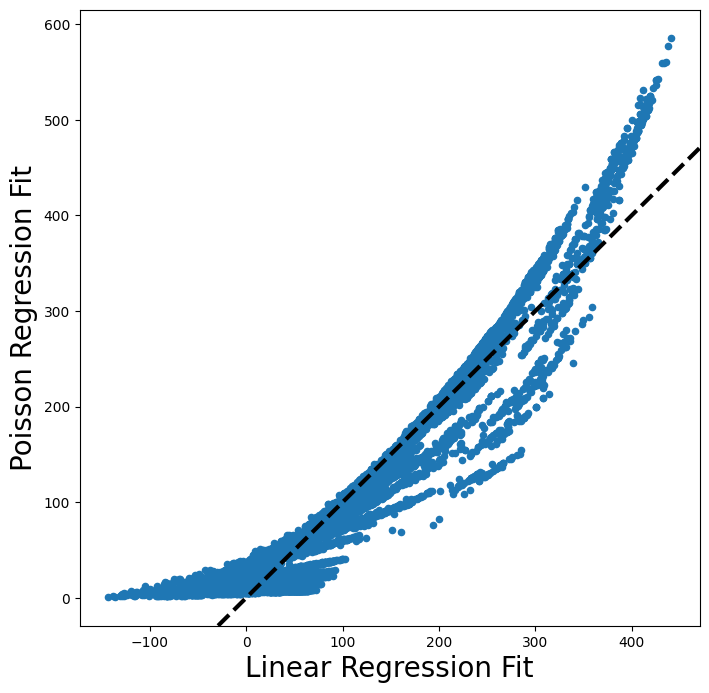

In [26]:
fig , ax = subplots(figsize =(8, 8))
ax.scatter(M2_lm.fittedvalues,
           M_pois.fittedvalues,
           s=20)
ax.set_xlabel('Linear Regression Fit', fontsize =20)
ax.set_ylabel('Poisson Regression Fit', fontsize =20)
ax.axline ([0,0], c='black', linewidth=3, linestyle='--', slope =1);

---